## Observations and Insights 

In [82]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
df_mouse_study = pd.merge(mouse_metadata, study_results, on = "Mouse ID")
# Display the data table for preview

In [83]:
# Checking the number of mice.
df_mouse_study["Mouse ID"].nunique()

249

In [84]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = df_mouse_study.loc[df_mouse_study.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()

In [85]:
# Optional: Get all the data for the duplicate mouse ID. 
df_mouse_study.loc[df_mouse_study["Mouse ID"] == "g989"]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [86]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
df_mouse_clean = df_mouse_study[df_mouse_study['Mouse ID'].isin(duplicate_mice)==False]


In [87]:
# Checking the number of mice in the clean DataFrame.
#df_mouse_clean.loc[df_mouse_clean["Mouse ID"] == "g989"]
df_mouse_clean["Mouse ID"].nunique()

248

## Summary Statistics

In [88]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
tumor_mean = df_mouse_clean.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
tumor_median = df_mouse_clean.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
tumor_std = df_mouse_clean.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
tumor_sem = df_mouse_clean.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']
drug_regimen = df_mouse_clean["Drug Regimen"]

In [89]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
df_agg = df_mouse_clean.groupby("Drug Regimen").aggregate(['count', 'mean','median','var','std','sem'])["Tumor Volume (mm3)"]

# Using the aggregation method, produce the same summary statistics in a single line
df_tumor_summary = pd.DataFrame({"Tumor Mean": tumor_mean, 
                                 "Tumor Median": tumor_median,
                                "Tumor Std Dev": tumor_std, "Tumor SEM": tumor_sem})

df_tumor_summary

,Tumor Mean,Tumor Median,Tumor Std Dev,Tumor SEM
Drug Regimen,,,,
Capomulin,40.675741,41.557809,4.994774,0.329346
Ceftamin,52.591172,51.776157,6.268188,0.469821
Infubinol,52.884795,51.820584,6.567243,0.492236
Ketapril,55.235638,53.698743,8.279709,0.603860
Naftisol,54.331565,52.509285,8.134708,0.596466
Placebo,54.033581,52.288934,7.821003,0.581331
Propriva,52.320930,50.446266,6.622085,0.544332
Ramicane,40.216745,40.673236,4.846308,0.320955
Stelasyn,54.233149,52.431737,7.710419,0.573111


In [90]:
df_agg

,count,mean,median,var,std,sem
Drug Regimen,,,,,,
Capomulin,230,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,178,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,178,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,188,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,186,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,181,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,148,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,228,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,181,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [91]:
test_count = df_mouse_clean["Drug Regimen"].value_counts()
df_test_counts = pd.DataFrame(test_count).reset_index()
df_test_counts = df_test_counts.rename(columns={"index": "Drug", "Drug Regimen": "Test Count"})
df_test_counts

,Drug,Test Count
0,Capomulin,230
1,Ramicane,228
2,Ketapril,188
3,Naftisol,186
4,Zoniferol,182
5,Placebo,181
6,Stelasyn,181
7,Ceftamin,178
8,Infubinol,178
9,Propriva,148


In [92]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
test_counts = df_test_counts.set_index("Drug")

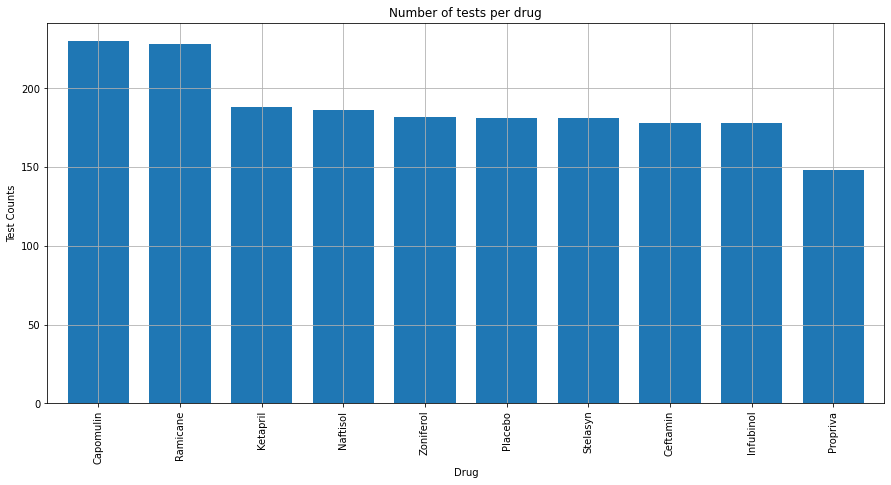

In [93]:
fig, ax=plt.subplots(figsize=(15,7))
test_counts.plot(kind='bar', ax=ax, width = .75);
ax.grid()
ax.set(xlabel="Drug",
       ylabel="Test Counts",
       title="Number of tests per drug"
      );
ax.get_legend().remove()

In [94]:
#Generate the variables for the plot
x_axis = df_test_counts["Drug"]
y_axis = df_test_counts["Test Count"]

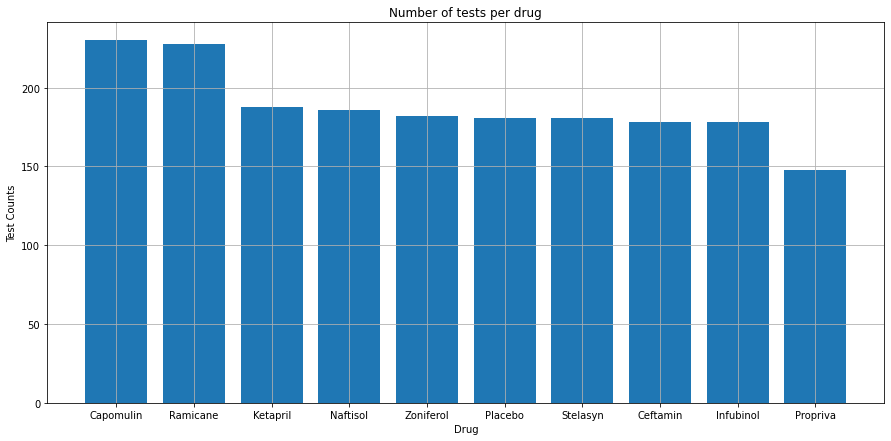

In [95]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
# Create a bar chart based upon the above data
fig, ax = plt.subplots(figsize = (15,7));
ax.grid();
ax.bar(x_axis, y_axis);
ax.set(xlabel= "Drug",
      ylabel = "Test Counts",
      title = "Number of tests per drug");

In [96]:
mouse_genders = df_mouse_clean["Sex"].value_counts()
my_colors= ['lightblue', 'silver']
explode = (0,.1)
labels = mouse_genders.index.values

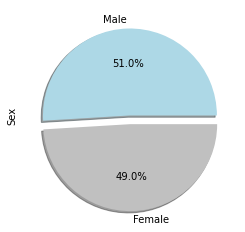

In [97]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mouse_genders.plot(kind='pie',colors=my_colors, explode=explode, shadow= True, autopct='%1.1f%%');

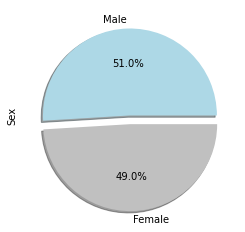

In [98]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(mouse_genders, colors = my_colors, labels = labels, explode = explode, shadow = True, autopct='%1.1f%%');
plt.ylabel("Sex");

## Quartiles, Outliers and Boxplots

In [99]:
last_measurement = df_mouse_clean.groupby("Mouse ID")["Timepoint"].max()
df_last_measurement = last_measurement.reset_index()

In [100]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merge_data = df_last_measurement.merge(df_mouse_clean, on= ["Mouse ID", "Timepoint"], how = "left")

In [101]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatment_drugs:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volume = merge_data.loc[merge_data["Drug Regimen"]== treatment, "Tumor Volume (mm3)"]
    # add subset 
    tumor_data.append(tumor_volume)
    # Determine outliers using upper and lower bounds using tumor_volume
    quartiles = tumor_volume.quantile([.25, .5, .75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq-lowerq
    lower_bound = round(lowerq-(1.5*iqr), 2)
    upper_bound = round(upperq +(1.5*iqr), 2)
    print(f"Values for {treatment} below {lower_bound} could be outliers.")
    print(f"Values for {treatment} above {upper_bound} could be outliers.")

Values for Capomulin below 20.7 could be outliers.
Values for Capomulin above 51.83 could be outliers.
Values for Ramicane below 17.91 could be outliers.
Values for Ramicane above 54.31 could be outliers.
Values for Infubinol below 36.83 could be outliers.
Values for Infubinol above 82.74 could be outliers.
Values for Ceftamin below 25.36 could be outliers.
Values for Ceftamin above 87.67 could be outliers.


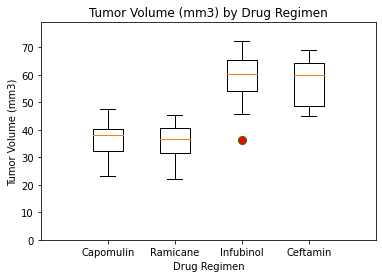

In [211]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots();
flierprops = dict(marker='o', markerfacecolor='r', markersize=8,
                  linestyle='none', markeredgecolor='g')
plt.boxplot(tumor_data, flierprops=flierprops)
ax1.set(xlim=(0, len(treatment_drugs) +1),
        ylim=(0, max(df_mouse_clean["Tumor Volume (mm3)"])+.5),
        xlabel=('Drug Regimen'),
        ylabel="Tumor Volume (mm3)",
        title="Tumor Volume (mm3) by Drug Regimen");
plt.xticks([1,2,3,4], treatment_drugs);

## Line and Scatter Plots

In [205]:
#Segmenting the DF for plotting
df_capomulin = df_mouse_clean.loc[df_mouse_clean["Drug Regimen"] == "Capomulin"]
df_vol_time = df_mouse_clean.loc[df_mouse_clean["Mouse ID"] == "s185"]

In [206]:
df_mouse_clean.loc[df_mouse_clean["Drug Regimen"] == "Capomulin"].head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


In [207]:
df_capomulin_1 = df_capomulin.groupby(['Mouse ID']).mean()

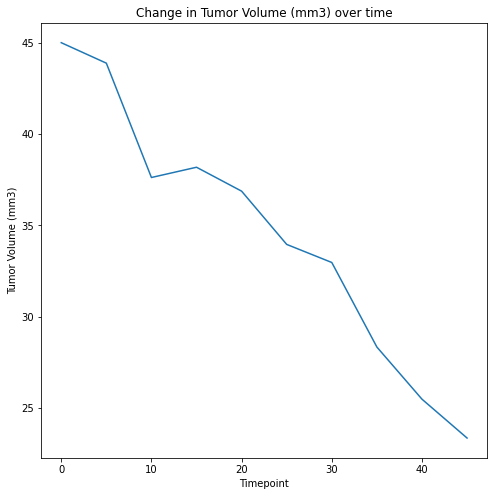

In [210]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
fig, ax = plt.subplots(figsize= (8,8));
ax.plot(df_vol_time["Timepoint"], df_vol_time["Tumor Volume (mm3)"]);
ax.set_xlabel("Timepoint");
ax.set_ylabel("Tumor Volume (mm3)");
ax.set_title("Change in Tumor Volume (mm3) over time");

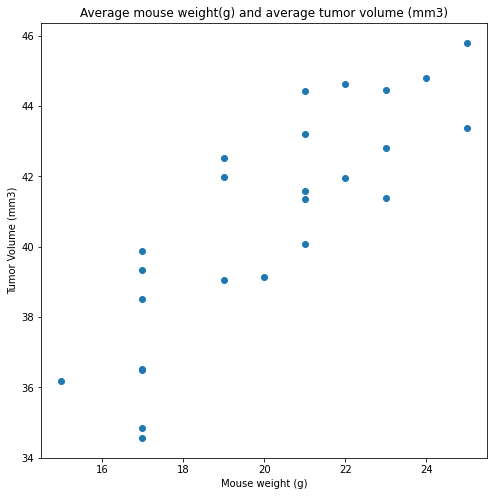

In [209]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
average_tumor = df_capomulin_1["Tumor Volume (mm3)"]
average_weight = df_capomulin_1["Weight (g)"]
fig, ax = plt.subplots(figsize=(8,8));
ax.scatter(average_weight, average_tumor);
ax.set_xlabel("Mouse weight (g)");
ax.set_ylabel("Tumor Volume (mm3)");
ax.set_title("Average mouse weight(g) and average tumor volume (mm3)");

## Correlation and Regression

In [201]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(average_weight, average_tumor)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.84


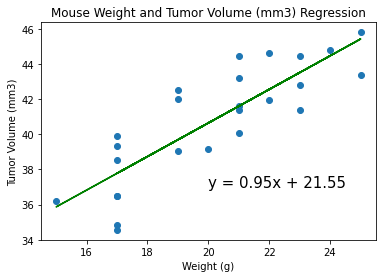

In [213]:
x_values = df_capomulin_1["Weight (g)"]
y_values = df_capomulin_1["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-", color="green")
plt.annotate(line_eq,(20,37),fontsize=15,color="black")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title("Mouse Weight and Tumor Volume (mm3) Regression")
plt.show()